In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

In [3]:
df = pd.read_excel(path_processed+'data.xlsx')
df.head()

### Exploratory Data Analysis

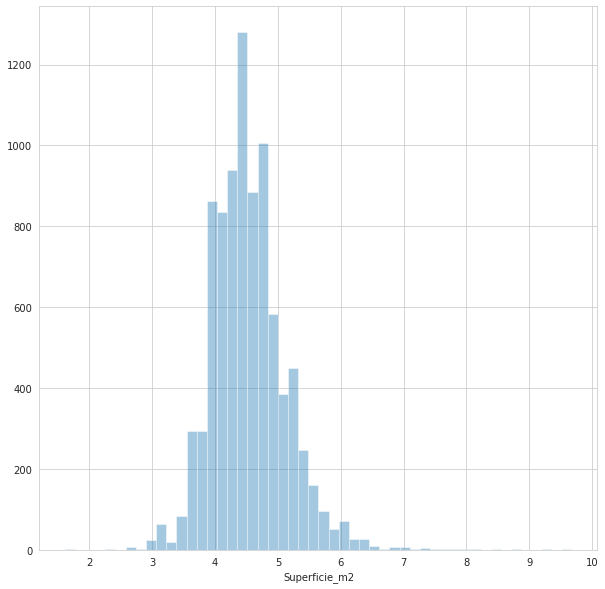

In [5]:
# Area [m2] distribution - take log to normalize
fig = plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.distplot(np.log(df['Superficie_m2']), kde=False)

In [6]:
df['Superficie_m2'].describe()

count     8748.000000
mean       118.471275
std        263.113562
min          5.000000
25%         64.000000
50%         90.000000
75%        125.000000
max      16000.000000
Name: Superficie_m2, dtype: float64

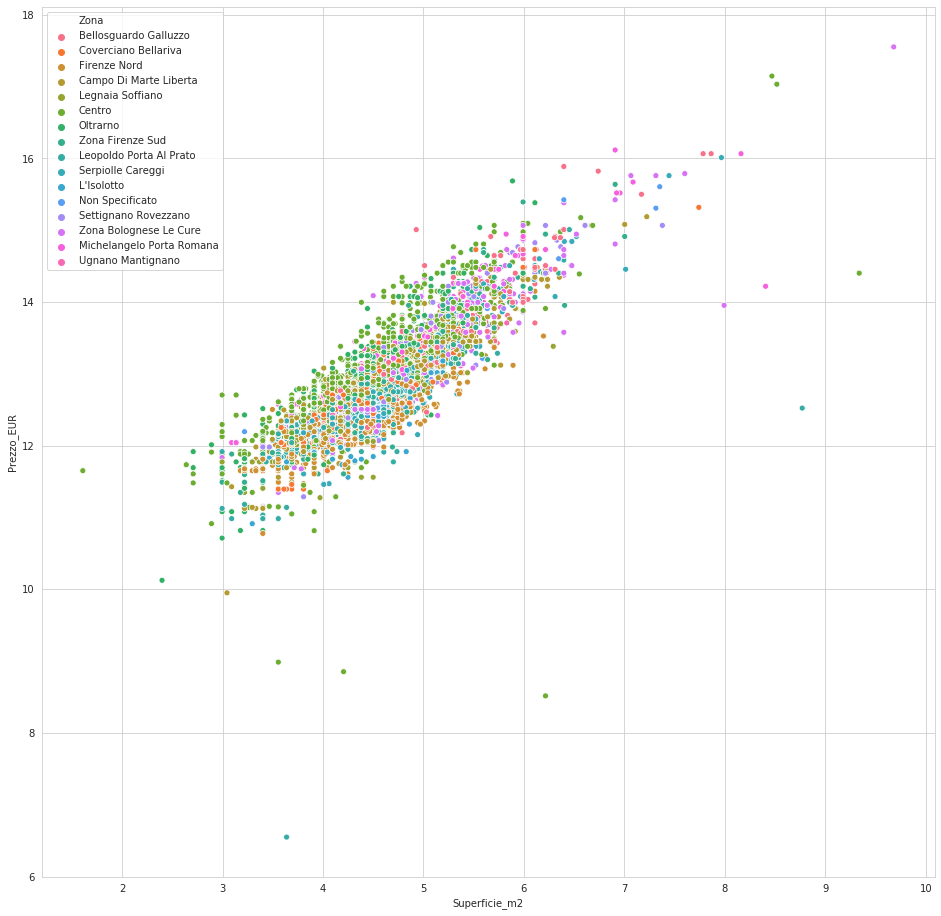

In [16]:
# Relationship between price and area - take log to normalize
fig = plt.figure(figsize=(16, 16))
sns.set_style('whitegrid')
sns.scatterplot(x=np.log(df['Superficie_m2']), y=np.log(df['Prezzo_EUR']), hue=df['Zona'])

There is a clear linear relationship between the price and the area where greater area means higher price. It is however difficult to distinguish the various areas in Florence.

In [8]:
df['Prezzo_EUR'].describe()

count    8.748000e+03
mean     4.887237e+05
std      7.997157e+05
min      7.000000e+02
25%      2.480000e+05
50%      3.400000e+05
75%      5.091000e+05
max      4.200000e+07
Name: Prezzo_EUR, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

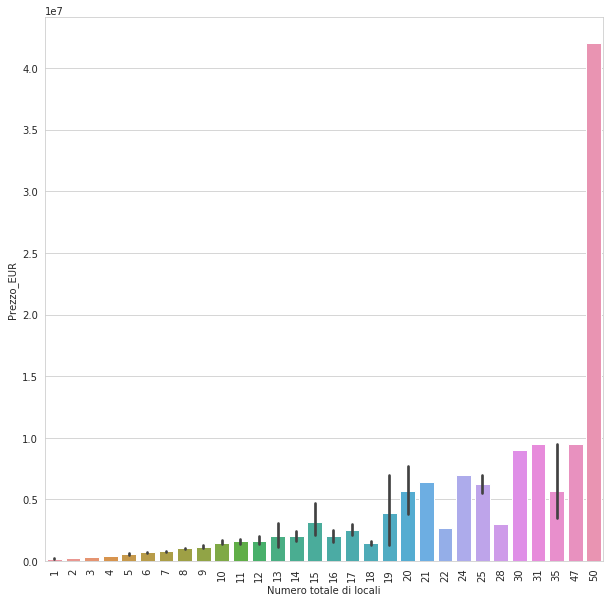

In [9]:
fig = plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo_EUR'], x=df['Numero totale di locali'])
plt.xticks(rotation=90)

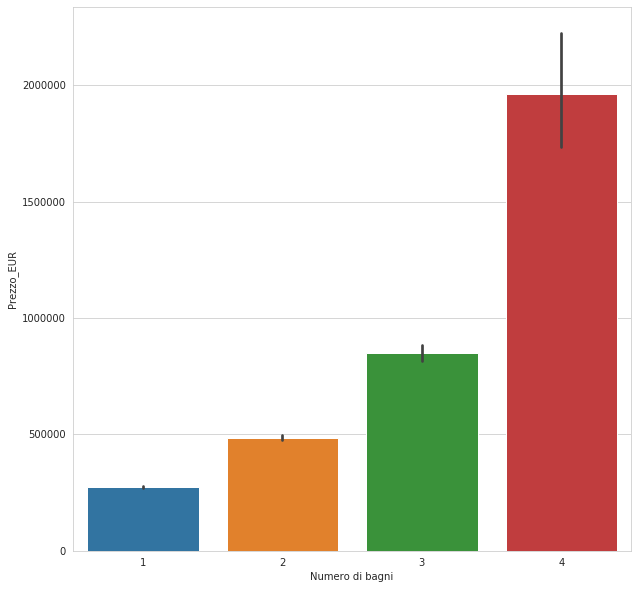

In [10]:
fig = plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo_EUR'], x=df['Numero di bagni'])

Text(0.5, 1.0, 'Average price per area')

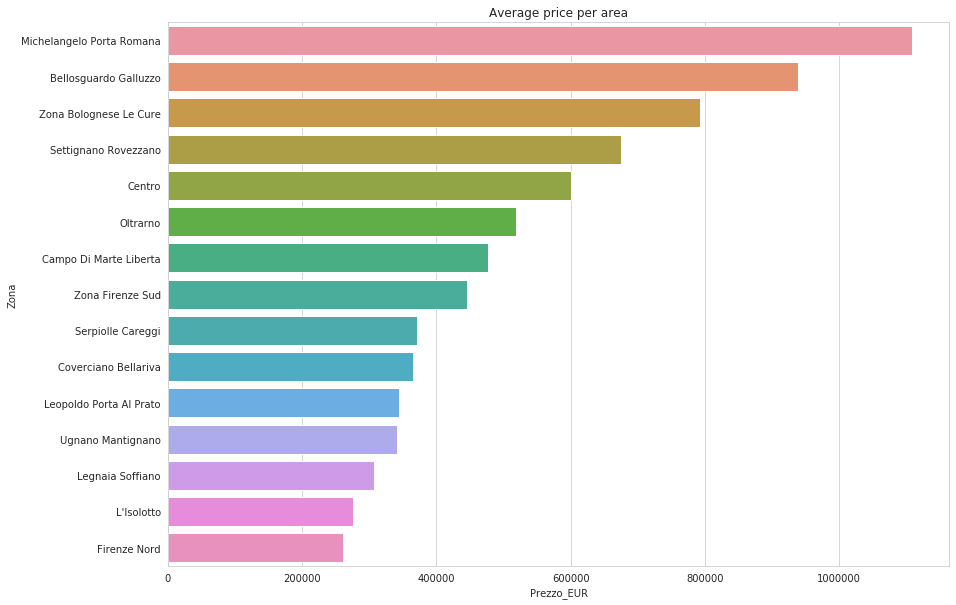

In [11]:
gb_ordered = (df.loc[df['Zona']!='Non Specificato', :]
              .groupby(['Zona'])
              .agg({'Prezzo_EUR': 'mean'})
              .sort_values('Prezzo_EUR', ascending=False))

fig = plt.figure(figsize=(14, 10))
sns.barplot(gb_ordered['Prezzo_EUR'], y=gb_ordered.index, ci=None)
plt.title('Average price per area')

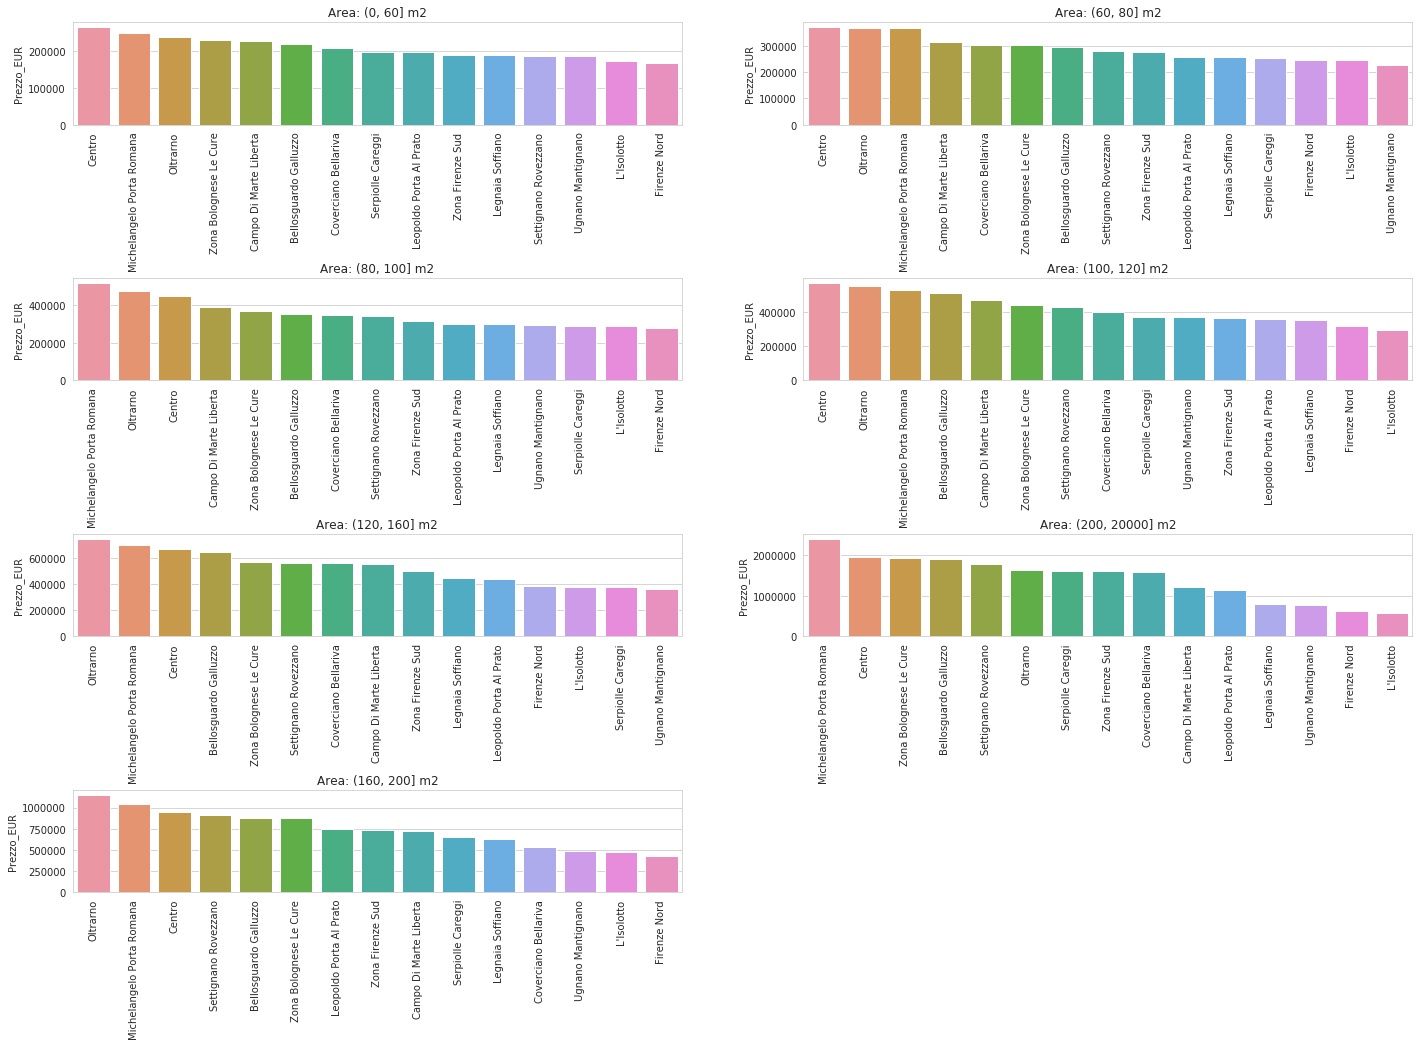

In [12]:
gb_ordered = (df.loc[df['Zona']!='Non Specificato', :]
              .groupby(['Superficie_Bins', 'Zona'])
              .agg({'Prezzo_EUR': 'mean'})
              .sort_values('Prezzo_EUR', ascending=False))

fig = plt.figure(figsize=(24, 16))
sns.set_style('whitegrid')
for i, area in enumerate(df['Superficie_Bins'].unique(), 1):
    y_values = gb_ordered.loc[gb_ordered.index.get_level_values('Superficie_Bins').values==area, 'Prezzo_EUR'].reset_index(level=0, drop=True)
    x_values = y_values.index

    plt.subplot(4, 2, i,)
    sns.barplot(y=y_values, x=x_values, ci=None)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.5)
    plt.xlabel(xlabel=None)
    plt.title('Area: ' + str(area) + ' m2')
    plt.xticks(rotation=90)

Text(0.5, 1.0, 'Average price per m2 per area')

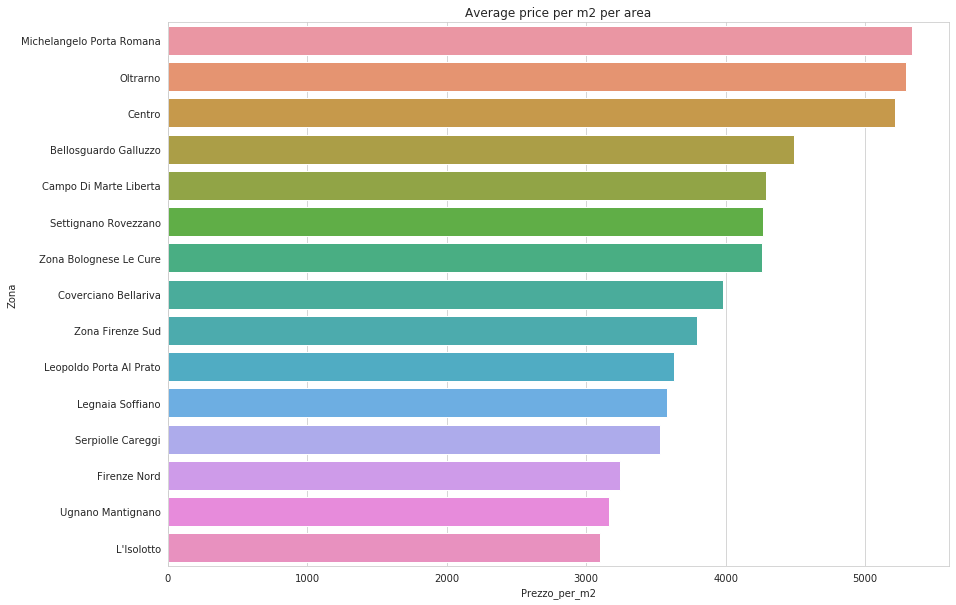

In [13]:
gb_ordered = (df.loc[df['Zona']!='Non Specificato', :]
              .groupby(['Zona'])
              .agg({'Prezzo_per_m2': 'mean'})
              .sort_values('Prezzo_per_m2', ascending=False))

fig = plt.figure(figsize=(14, 10))
sns.barplot(gb_ordered['Prezzo_per_m2'], y=gb_ordered.index, ci=None)
plt.title('Average price per m2 per area')

In [14]:
df['Zona'].value_counts()

Centro                       1666
Campo Di Marte Liberta       1342
Leopoldo Porta Al Prato       896
Firenze Nord                  876
Serpiolle Careggi             615
Coverciano Bellariva          558
Oltrarno                      558
Zona Bolognese Le Cure        452
Zona Firenze Sud              424
Legnaia Soffiano              376
Bellosguardo Galluzzo         276
Settignano Rovezzano          241
L'Isolotto                    238
Michelangelo Porta Romana     170
Ugnano Mantignano              33
Non Specificato                27
Name: Zona, dtype: int64

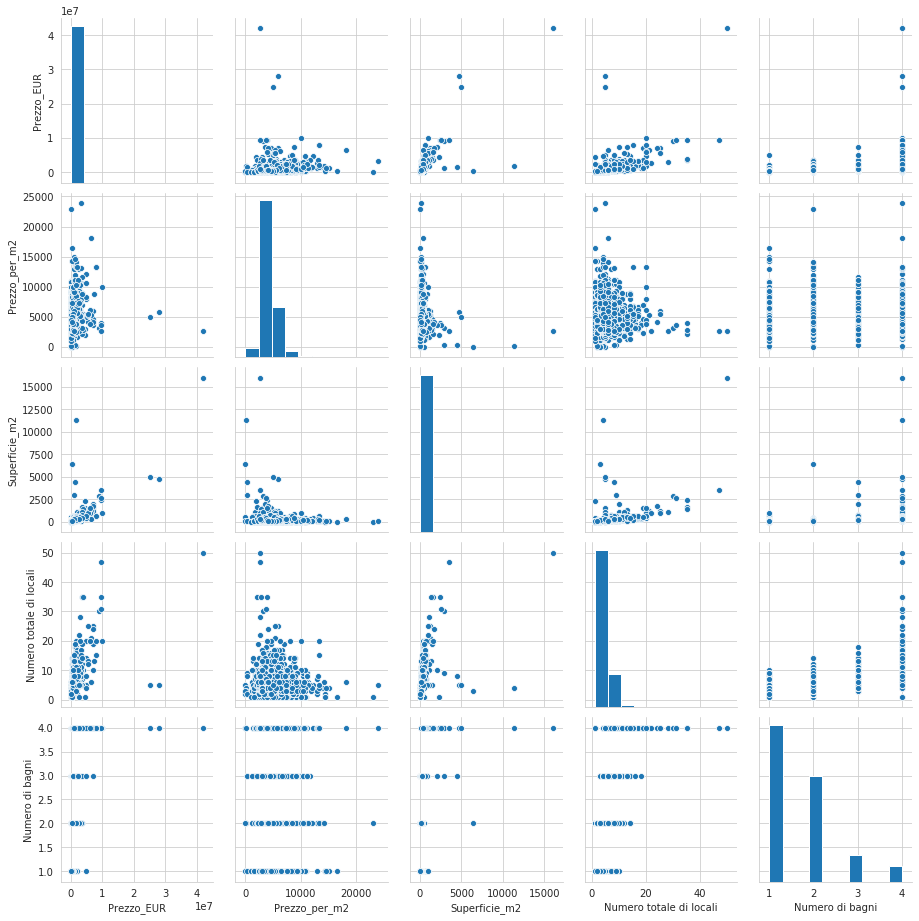

In [15]:
sns.pairplot(df)